## Team Memebers


*   Aser Osama   202101266

*   Aya Sherif    202100642
*   Mariam Ismael 202101506


*   Salma Hatem 202100381



# Part 1

## Setup

Importing file

In [ ]:
from google.colab import files


text_file = files.upload()

Saving Test_text_file.txt to Test_text_file.txt


1. Computing an estimate of the
probabilities of the different English characters (symbols) in this text
file

In [ ]:
# saving the text in the file in a string
text = text_file["Test_text_file.txt"]

text = str(text)
text = text[2:len(text)-1]

# create dictionary with character and their coressponding probability
char_probability = {}
for i in range(97, 123):
    char_probability[chr(i)] = 0
char_probability['('] = 0
char_probability[')'] = 0
char_probability['.'] = 0
char_probability[','] = 0
char_probability['/'] = 0
char_probability['-'] = 0
char_probability[' '] = 0

for c in text:
    char_probability[c] += 1
for x in char_probability:
    char_probability[x] = char_probability[x]/len(text)
print(char_probability)

{'a': 0.07193732193732194, 'b': 0.012108262108262107, 'c': 0.026353276353276354, 'd': 0.045584045584045586, 'e': 0.10398860398860399, 'f': 0.013532763532763533, 'g': 0.014245014245014245, 'h': 0.02207977207977208, 'i': 0.06054131054131054, 'j': 0.0007122507122507123, 'k': 0.0007122507122507123, 'l': 0.04202279202279202, 'm': 0.021367521367521368, 'n': 0.0641025641025641, 'o': 0.06267806267806268, 'p': 0.037037037037037035, 'q': 0.0007122507122507123, 'r': 0.05982905982905983, 's': 0.05626780626780627, 't': 0.07193732193732194, 'u': 0.018518518518518517, 'v': 0.009259259259259259, 'w': 0.007834757834757835, 'x': 0.004985754985754986, 'y': 0.00641025641025641, 'z': 0.002136752136752137, '(': 0.002136752136752137, ')': 0.002136752136752137, '.': 0.004273504273504274, ',': 0.007834757834757835, '/': 0.0007122507122507123, '-': 0.011396011396011397, ' ': 0.1346153846153846}


2. Calculating the entropy

In [ ]:
import math
entropy = 0
for c in char_probability:
    entropy += -char_probability[c] * math.log2(char_probability[c])

entropy

4.25701056473807

3. Calculating the number of bits/symbol in a fixed length
code and its effeciency

In [ ]:
bits_fixed_length =  math.ceil(math.log2(len(char_probability)))
effeciency_fixed_length = entropy/bits_fixed_length
print("fixed length code\t "+ str(bits_fixed_length) + " bits/symbol\n", "effeciency\t\t", effeciency_fixed_length*100, " %")

fixed length code	 6 bits/symbol
 effeciency		 70.95017607896783  %


## Huffman

4. Encoder

In [ ]:
# creating class for tree node
class Node:
    def __init__(self, char=None, probability=0):
        self.char = char
        self.probability = probability
        self.left = None
        self.right = None

# initializing nodes
tree = []
for x in char_probability:
    tree.append(Node(x, char_probability[x]))

# creating tree
while(len(tree) > 1):
    tree.sort(key = lambda p: -p.probability)  # sort probabilities descendingly
    left = tree.pop()
    right = tree.pop()
    node = Node('*',left.probability + right.probability)
    node.right = right
    node.left = left
    tree.append(node)



# creating code
char_code = {}
for x in char_probability:
    char_code[x] = ""

def code(node, node_code):
    if node:
        if node.char != '*':
            char_code[node.char] = node_code
        code(node.left, node_code + "0")
        code(node.right, node_code  + "1")

code(tree[0],'')

def encode_huffman(text):
    encoded_text = ""
    for s in text:
        encoded_text += char_code[s]

    return encoded_text

huffman_encoded_text = encode_huffman(text)


5. Decoder

In [ ]:
# Decode the Huffman encoded text directly
def decode_huffman(encoded_text, root):
    decoded_text = ""
    current_node = root

    for bit in encoded_text:
        if bit == '0':
            current_node = current_node.left
        elif bit == '1':
            current_node = current_node.right

        # If a leaf node is reached, append the character and reset to root
        if current_node.char != '*':  # Leaf node
            decoded_text += current_node.char
            current_node = root  # Reset to root for the next character

    return decoded_text

# Decode the encoded text
decoded_text = decode_huffman(huffman_encoded_text, tree[0])

# Print the decoded text
print("Decoded Text:")
print(decoded_text)



Decoded Text:
in this paper, a novel decorrelation-based concurrent digital predistortion (dpd) solution is proposed for dual-band transmitters (tx) employing a single wideband power amplifier (pa), and utilizing just a single feedback receiver path. the proposed decorrelation-based parameter learning solution is both flexible and simple, and operates in a closed-loop manner, opposed to the widely applied indirect learning architecture. the proposed decorrelation-based learning and dpd processing can also be effectively applied to more ordinary single-band transmissions, as well as generalized to more than two transmit bands. through a comprehensive analysis covering both the dpd parameter learning and the main path processing, it is shown that the complexity of the proposed concurrent dpd is substantially lower compared with the other state-of-the-art concurrent dpd methods. extensive set of quantitative simulation and rf measurement results are also presented, using a base-station pa

In [ ]:
with open("decode_file_huffman.txt", "w") as file:
    file.write(decoded_text)
file.close()

comparing decoded stream with the original stream

In [ ]:

def CompareTexts(text1, text2):
  if len(text1) != len(text2):
    return False
  for i in range(0, len(text1)):
    if text1[i] != text2[i]:
      print(i)
      return False
  return True

print("Texts are the same") if CompareTexts(text, decoded_text) else print("Texts are not the same")

Texts are the same


6. Calculating the efficiency of the Huffman code

In [ ]:
def CalculateEfficiencyHuffman():
  average_code_length = 0
  for code in char_code:
    average_code_length += len(char_code[code]) * char_probability[code]
  return entropy / average_code_length

print("Huffman code efficiency: ", CalculateEfficiencyHuffman())

Huffman code efficiency:  0.995476820934752


## Shannon-Fano

7. Encoder

In [ ]:
from pprint import pprint
def ShannonFanoEncoder(symbols):
  codes = {}
  assignCodes(symbols, "", codes)
  return codes

def assignCodes(symbols, prefix, codes):
    if len(symbols) == 1:
        codes[symbols[0][0]] = prefix
        return

    splitPoint = findSplitPoint(symbols)
    firstGroup = symbols[:splitPoint + 1]
    secondGroup = symbols[splitPoint + 1:]

    assignCodes(firstGroup, prefix + "0", codes)
    assignCodes(secondGroup, prefix + "1", codes)


def findSplitPoint(symbols):
    totalFrequency = 0
    for i in range(0, len(symbols)):
        totalFrequency += symbols[i][1]

    cumulativeFrequency = 0
    half_total = totalFrequency / 2
    for i in range(0, len(symbols)):
        cumulativeFrequency += symbols[i][1]
        if cumulativeFrequency >= half_total:
          return i if (abs(cumulativeFrequency - half_total) < abs(cumulativeFrequency - (half_total + symbols[i][1]))) else i - 1


    return len(symbols) - 1

def EncodeText(text, codes):
  encoded_text = ""
  for char in text:
    encoded_text += codes[char]
  return encoded_text


char_probability1 = {
    'a': 0.3,
    'b': 0.25,
    'c': 0.2,
    'd': 0.15,
    'e': 0.1
}
text1 = "abcdabcdabdd"

sorted_char_probability = sorted(char_probability.items(), key=lambda x: x[1],  reverse=True)
codes = ShannonFanoEncoder(sorted_char_probability)
shannon_encoded_text = EncodeText(text, codes)

Shannon-Fano codes

In [ ]:
print("{:<10} {:<10}".format('character', 'code'))
for key, value in codes.items():
    print("{:<10} {:<10}".format(key, value))

character  code      
           000       
e          001       
a          0100      
t          0101      
n          0110      
o          0111      
i          1000      
r          1001      
s          1010      
d          10110     
l          10111     
p          11000     
c          11001     
h          11010     
m          11011     
u          111000    
g          111001    
f          111010    
b          111011    
-          111100    
v          1111010   
w          1111011   
,          1111100   
y          1111101   
x          11111100  
.          11111101  
z          111111100 
(          111111101 
)          1111111100
j          1111111101
k          1111111110
q          11111111110
/          11111111111


Decoder

In [ ]:
def ShannonFanoDecoder(encoded_text, codes):
    decoded_text = ""
    current_code = ""
    for char in encoded_text:
        current_code += char
        for code in codes:
            if codes[code] == current_code:
                decoded_text += code
                current_code = ""
                break
    return decoded_text


shannon_decoded_text = ShannonFanoDecoder(shannon_encoded_text, codes)


In [ ]:
with open("decode_file_shannon.txt", "w") as file:
    file.write(decoded_text)
file.close()

comparing decoded stream with the original stream

In [ ]:
def CompareTexts(text1, text2):
  if len(text1) != len(text2):
    return False
  for i in range(0, len(text1)):
    if text1[i] != text2[i]:
      print(i)
      return False
  return True

print("Texts are the same") if CompareTexts(text, shannon_decoded_text) else print("Texts are not the same")

Texts are the same


Calculating the efficiency of the Shannon-Fano code

In [ ]:
def CalculateEfficiencyShannon():
  average_code_length = 0
  for code in codes:
    average_code_length += len(codes[code]) * char_probability[code]
  return entropy / average_code_length

print("Shannon-Fano code efficiency: ", CalculateEfficiencyShannon())

Shannon-Fano code efficiency:  0.9948140534108271


**8-Efficiency Comparison: Shannon-Fanovs. Huffman Codes**

In [ ]:
# Comparison Function using pre-computed variables
def compare_coding_methods(fixed_avg_length, huffman_avg_length, shannon_fano_avg_length,
                           fixed_efficiency, huffman_efficiency, shannon_fano_efficiency):
    # Display Results
    print(f"{'Method':<15} {'Average Length':<20} {'Efficiency (%)':<20}")
    print(f"{'Fixed-Length':<15} {fixed_avg_length:<20.4f} {fixed_efficiency * 100:<20.2f}")
    print(f"{'Huffman':<15} {huffman_avg_length:<20.4f} {huffman_efficiency * 100:<20.2f}")
    print(f"{'Shannon-Fano':<15} {shannon_fano_avg_length:<20.4f} {shannon_fano_efficiency * 100:<20.2f}")

# Call the function with the pre-computed values
compare_coding_methods(bits_fixed_length, math.ceil(CalculateEfficiencyHuffman()*entropy), math.ceil(CalculateEfficiencyShannon()*entropy),
                       effeciency_fixed_length, CalculateEfficiencyHuffman(), CalculateEfficiencyShannon())


Method          Average Length       Efficiency (%)      
Fixed-Length    6.0000               70.95               
Huffman         5.0000               99.55               
Shannon-Fano    5.0000               99.48               


#Part 2

In [ ]:
import numpy as np

### Encoder

In [ ]:
G = np.array([[1, 1, 0, 1, 0, 0, 0],
              [0, 1, 1, 0, 1, 0, 0],
              [1, 1, 1, 0, 0, 1, 0],
              [1, 0, 1, 0, 0, 0, 1]])

In [ ]:
def hammingCodeEncoder(input_text):
  input_text += '0' * (len(input_text) % 4)
  encoded_bits =[]
  for i in range(0,len(input_text),4):
      m = []
      for j in range(4):
          m.append(int(input_text[i+j]))
      c = m @ G
      c = c % 2
      encoded_bits = np.concatenate((encoded_bits,c))
      BPSK = encoded_bits*2-1
  return encoded_bits, BPSK


def AWGN(signal, snr_db):
    snr = 10**(snr_db/10)
    power = np.mean((signal)**2)
    noise_power = power/snr     # snr = power/noise_power
    noise = np.random.normal(0,1,len(signal))
    noise *= noise_power
    return signal + noise

In [ ]:
encoded_bits, BPSK_signal = hammingCodeEncoder(huffman_encoded_text)
noisy_signal = AWGN(BPSK_signal, 10)

### Decoder

In [ ]:
H = np.array([[1, 0, 0, 1, 0, 1, 1],
              [0, 1, 0, 1, 1, 1, 0],
              [0, 0, 1, 0, 1, 1, 1]])


In [ ]:
from pprint import pprint
def generate_error_codes():
  error_codes = {}
  i_mat = np.identity(7, dtype=int)
  i_z = [0, 0, 0, 0, 0, 0, 0]
  syndrome = tuple(i_z @ H.T % 2)
  error_codes[syndrome] = i_z
  for i in range(7):
    syndrome = tuple(i_mat[i] @ H.T % 2)
    error_codes[syndrome] = list(i_mat[i])
  return error_codes

error_codes = generate_error_codes()
# pprint(error_codes)

def hammingCodeDecoder(noisy_signal):
# Threshold the noisy BPSK signal to convert to binary
    received_signal = []
    for value in noisy_signal:
        if value > 0:
            received_signal.append(1)
        else:
            received_signal.append(0)

    decoded_messages = []
    corrected_codewords = []

    for i in range(0, len(received_signal), 7):
      received_codeword = received_signal[i:i+7]
      syndrome = tuple(received_codeword @ H.T % 2)
      error_code = [0, 0, 0, 0, 0, 0, 0]
      if syndrome in error_codes:
        error_code = error_codes[syndrome]
      # print(received_codeword, error_code, syndrome)
      received_codeword = [received_codeword[j] ^ error_code[j] for j in range(7)]
      original_message = received_codeword[3:]
      decoded_messages.append(original_message)
      corrected_codewords.append(received_codeword)

      string  = np.concatenate(decoded_messages).tolist()
      string = list(map(str, string))
      hamming_decoded_messages = ''.join(string)
    return hamming_decoded_messages






In [ ]:
decoded_messages = hammingCodeDecoder(noisy_signal)
print("Decoded Messages:", decoded_messages)
# print("Corrected Codewords:", corrected_codewords)


Decoded Messages: 0111100110111001111110111010010111100110111100001011001010111011101101100110001110110001111101010000001000111000011001100011111011011100011110001001000100000101110101000010000101000111000100100011111010011001100011001110010100000111010110011111001101111101011110001100010000011101001100100001101100011110001001101010111101000011100000001011110010101001000111101110101100011110001001101011101001011110001101000111001000010000100001010101001000011010100001110101101111100001000001011101100100001011100011011011001010011111001111100110000101100100101010111101110011101110010111100101001111110111001111010000101010011110010101101011101101010001111001010110111100011010101110011100000010001011101100100001011110010000101110001011010111011111101110011110011101010001110010110101010111101111001101010111100010101110111011001000010111101011000111111100111111011110011110010101101011110111110111101001001100101110110101000111100101011011110001101010100001001000000010111010001111101111100101

In [ ]:
# bit_string = ""
# for message in decoded_messages:
#     for bit in message:
#          bit_string += str(bit)  # Convert each bit to a string and concatenate


### BER vs SNR


In [ ]:
def calculate_BER(original_data, decoded_data):
  original_data = np.array(list(original_data))
  decoded_data = np.array(list(decoded_data))
  errors = np.sum(np.array(original_data) != np.array(decoded_data))
  return errors / len(original_data)

In [ ]:
def transmitnReceiveBits(bits_to_transmit,snr):
    data = np.array(list(bits_to_transmit), dtype=int)
    data_noisy_signal = AWGN(data*2-1, snr) #Convert to BPSK before adding noise
    decoded_data = []
    for value in data_noisy_signal:  #Threshold the noisy signal to get binary values
      if value>0:
        decoded_data.append(1)
      else:
        decoded_data.append(0)

    decoded_data = list(map(str, decoded_data))
    decoded_data = ''.join(decoded_data)
    return decoded_data

In [ ]:
def transmitnReceiveBitsWithEncoding(bits_to_transmit,snr):
    encoded_data, BPSK = hammingCodeEncoder(bits_to_transmit)
    data_noisy_signal = AWGN(BPSK, snr)
    decoded_data = hammingCodeDecoder(data_noisy_signal)
    return decoded_data

In [ ]:
import matplotlib.pyplot as plt

snr_range = np.arange(-5,30,1)
ber_with_coding=[]
ber_without_coding =[]
# data = huffman_encoded_text;
data = shannon_encoded_text
for snr in snr_range:
  #with Hamming code
  print(snr)
  decoded_data_coding = transmitnReceiveBitsWithEncoding(data,snr)
  ber_with_coding.append(calculate_BER(data, decoded_data_coding))

  #without Hamming code
  received_data = transmitnReceiveBits(data,snr)
  ber_without_coding.append(calculate_BER(data, received_data))
  #print(ber_with_coding)


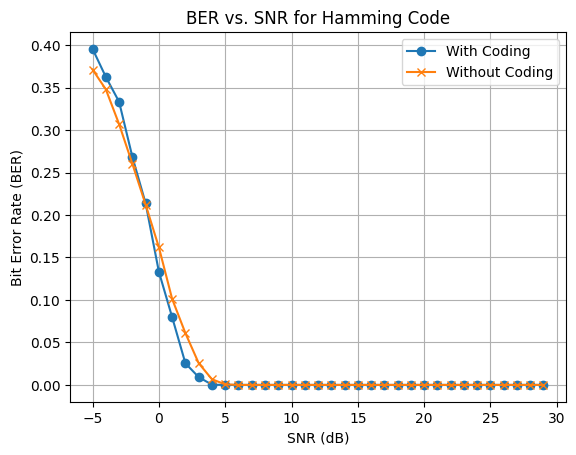

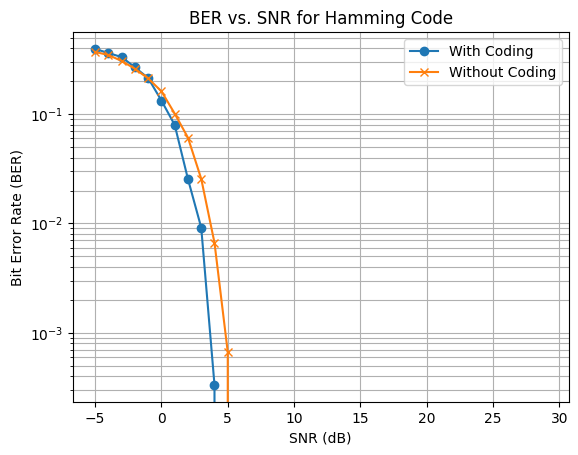

In [ ]:
#plotting
plt.figure()
plt.plot(snr_range, ber_with_coding, label="With Coding", marker="o")
plt.plot(snr_range, ber_without_coding, label="Without Coding", marker="x")
plt.xlabel("SNR (dB)")
plt.ylabel("Bit Error Rate (BER)")
plt.title("BER vs. SNR for Hamming Code")
plt.legend()
plt.grid(True, which="both")
plt.show()
#plotting
plt.figure()
plt.semilogy(snr_range, ber_with_coding, label="With Coding", marker="o")
plt.semilogy(snr_range, ber_without_coding, label="Without Coding", marker="x")
plt.xlabel("SNR (dB)")
plt.ylabel("Bit Error Rate (BER)")
plt.title("BER vs. SNR for Hamming Code")
plt.legend()
plt.grid(True, which="both")
plt.show()

## End-to-end Communication System

In [ ]:
def countDiffChar(a, b):
    min_len = min(len(a), len(b))
    c = 0

    for i in range(min_len):
        if a[i] != b[i]:
            c += 1

    c += abs(len(a) - len(b))

    return c
countDiffChar(text,text)

0

Shannon Encoding SNR = 0 dB

In [ ]:
data = shannon_encoded_text
snr = 0
received_data = transmitnReceiveBits(data,snr)
recieved_text = ShannonFanoDecoder(received_data, codes)
recieved_text_error_1 = countDiffChar(recieved_text, text)

received_data_hamming = transmitnReceiveBitsWithEncoding(data,snr)
recieved_text_hamming = ShannonFanoDecoder(received_data_hamming, codes)
recieved_text_hamming_error_1 = countDiffChar(recieved_text_hamming, text)

ber = calculate_BER(data, received_data)
ber_hamming = calculate_BER(data, received_data_hamming)
print("original text: ")
print(text)
print("\nShannon Encoding, No channel Encoding, SNR = 0 dB")
print(recieved_text)
print("\nShannon Encoding, Hamming channel Encoding, SNR = 0 dB")
print(recieved_text_hamming)

original text: 
in this paper, a novel decorrelation-based concurrent digital predistortion (dpd) solution is proposed for dual-band transmitters (tx) employing a single wideband power amplifier (pa), and utilizing just a single feedback receiver path. the proposed decorrelation-based parameter learning solution is both flexible and simple, and operates in a closed-loop manner, opposed to the widely applied indirect learning architecture. the proposed decorrelation-based learning and dpd processing can also be effectively applied to more ordinary single-band transmissions, as well as generalized to more than two transmit bands. through a comprehensive analysis covering both the dpd parameter learning and the main path processing, it is shown that the complexity of the proposed concurrent dpd is substantially lower compared with the other state-of-the-art concurrent dpd methods. extensive set of quantitative simulation and rf measurement results are also presented, using a base-station 

Shannon Encoding SNR = 3 dB

In [ ]:
data = shannon_encoded_text
snr = 3
received_data = transmitnReceiveBits(data,snr)
recieved_text = ShannonFanoDecoder(received_data, codes)
recieved_text_error_2 = countDiffChar(recieved_text, text)

received_data_hamming = transmitnReceiveBitsWithEncoding(data,snr)
recieved_text_hamming = ShannonFanoDecoder(received_data_hamming, codes)
recieved_text_hamming_error_2 = countDiffChar(recieved_text_hamming, text)

ber = calculate_BER(data, received_data)
ber_hamming = calculate_BER(data, received_data_hamming)
print("original text: ")
print(text)
print("\nShannon Encoding, No channel Encoding, SNR = 3 dB")
print(recieved_text)
print("\nShannon Encoding, Hamming channel Encoding, SNR = 3 dB")
print(recieved_text_hamming)

original text: 
in this paper, a novel decorrelation-based concurrent digital predistortion (dpd) solution is proposed for dual-band transmitters (tx) employing a single wideband power amplifier (pa), and utilizing just a single feedback receiver path. the proposed decorrelation-based parameter learning solution is both flexible and simple, and operates in a closed-loop manner, opposed to the widely applied indirect learning architecture. the proposed decorrelation-based learning and dpd processing can also be effectively applied to more ordinary single-band transmissions, as well as generalized to more than two transmit bands. through a comprehensive analysis covering both the dpd parameter learning and the main path processing, it is shown that the complexity of the proposed concurrent dpd is substantially lower compared with the other state-of-the-art concurrent dpd methods. extensive set of quantitative simulation and rf measurement results are also presented, using a base-station 

Shannon Encoding SNR = 10 dB

In [ ]:
data = shannon_encoded_text
snr = 10
received_data = transmitnReceiveBits(data,snr)
recieved_text = ShannonFanoDecoder(received_data, codes)
recieved_text_error_3 = countDiffChar(recieved_text, text)

received_data_hamming = transmitnReceiveBitsWithEncoding(data,snr)
recieved_text_hamming = ShannonFanoDecoder(received_data_hamming, codes)
recieved_text_hamming_error_3 = countDiffChar(recieved_text_hamming, text)

ber = calculate_BER(data, received_data)
ber_hamming = calculate_BER(data, received_data_hamming)
print("original text: ")
print(text)
print("\nShannon Encoding, No channel Encoding, SNR = 10 dB")
print(recieved_text)
print("\nShannon Encoding, Hamming channel Encoding, SNR = 10 dB")
print(recieved_text_hamming)

original text: 
in this paper, a novel decorrelation-based concurrent digital predistortion (dpd) solution is proposed for dual-band transmitters (tx) employing a single wideband power amplifier (pa), and utilizing just a single feedback receiver path. the proposed decorrelation-based parameter learning solution is both flexible and simple, and operates in a closed-loop manner, opposed to the widely applied indirect learning architecture. the proposed decorrelation-based learning and dpd processing can also be effectively applied to more ordinary single-band transmissions, as well as generalized to more than two transmit bands. through a comprehensive analysis covering both the dpd parameter learning and the main path processing, it is shown that the complexity of the proposed concurrent dpd is substantially lower compared with the other state-of-the-art concurrent dpd methods. extensive set of quantitative simulation and rf measurement results are also presented, using a base-station 

In [ ]:
print("Shannon Encoding, No channel Encoding, SNR = 0 dB")
print("number of erroneous symbols: ", recieved_text_error_1)
print("error percentage: ", round(recieved_text_error_1/len(text),2)*100)
print("\n")

print("Shannon Encoding, Hamming channel Encoding, SNR = 0 dB")
print("number of erroneous symbols: ", recieved_text_hamming_error_1)
print("error percentage: ", round(recieved_text_hamming_error_1/len(text),2)*100)
print("\n")


print("Shannon Encoding, No channel Encoding, SNR = 3 dB")
print("number of erroneous symbols: ", recieved_text_error_2)
print("error percentage: ", round(recieved_text_error_2/len(text),2)*100)
print("\n")

print("Shannon Encoding, Hamming channel Encoding, SNR = 3 dB")
print("number of erroneous symbols: ", recieved_text_hamming_error_2)
print("error percentage: ", round(recieved_text_hamming_error_2/len(text),2)*100)
print("\n")


print("Shannon Encoding, No channel Encoding, SNR = 10 dB")
print("number of erroneous symbols: ", recieved_text_error_3)
print("error percentage: ", round(recieved_text_error_3/len(text),2)*100)
print("\n")

print("Shannon Encoding, Hamming channel Encoding, SNR = 10 dB")
print("number of erroneous symbols: ", recieved_text_hamming_error_3)
print("error percentage: ", round(recieved_text_hamming_error_3/len(text),2)*100)
print("\n")

Shannon Encoding, No channel Encoding, SNR = 0 dB
number of erroneous symbols:  1315
error percentage:  94.0


Shannon Encoding, Hamming channel Encoding, SNR = 0 dB
number of erroneous symbols:  1312
error percentage:  93.0


Shannon Encoding, No channel Encoding, SNR = 3 dB
number of erroneous symbols:  1094
error percentage:  78.0


Shannon Encoding, Hamming channel Encoding, SNR = 3 dB
number of erroneous symbols:  979
error percentage:  70.0


Shannon Encoding, No channel Encoding, SNR = 10 dB
number of erroneous symbols:  0
error percentage:  0.0


Shannon Encoding, Hamming channel Encoding, SNR = 10 dB
number of erroneous symbols:  0
error percentage:  0.0


